# Calculo de la Constante de Planck

## por: 
## Yennifer Angarita Aarenas
## Alejandro Mesa Gómez

para este experimento se sigue la guía propuesta en el articulo "Classroom fundamentals: measuring the Planck constant" de Maria Rute de Amorim e Sá Ferreira André y Paulo Sérgio de Brito André.

en el cual se halla el voltaje de activación de diferentes leds y a partir de estos, su energía y finalmente  a plicando la ecuacion: $$E_{p} = \frac{hc}{\lambda} $$ se puede despejar el valor de h

#### Preparación del programa:  

In [1]:
import numpy as np
#import pyfirmata as pyF
from time import sleep
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy import constants as cons


######################################
##VECTORES
######################################
led=[1.6325,2.424,2.566,3.7095] #ir,rojo,naranja,azul.... voltajes de activacion
lamb=[1.10e6,1.60514e6,1.70648e6,2.14133e6] #para el ejercio inicial
lamb_ajuste=[1.10e6,1.60514e6,1.70648e6,1.763668e6]  #1/lambda #ir,rojo,naranja,azul
lamb_ajuste2=[1.60514e6,1.70648e6,1.763668e6] 
IR=np.loadtxt("datos_IR.dat")
Red=np.loadtxt("datos_rojo.dat")
#Blue=np.loadtxt("datos_azul.dat")
Green=np.loadtxt("datos_verde.dat")
Orange=np.loadtxt("datos_naranja.dat")


volt_IR=IR[:,0]
volt_IR*=(3.3/5.)
volt_red=Red[:,0]
volt_red*=(3.3/5.)
#volt_blue=Blue[:,0]
volt_green=Green[:,0]
volt_green*=(3.3/5.)
volt_orange=Orange[:,0]
volt_orange*=(3.3/5.)

curr_IR=IR[:,1]
curr_IR*=(3.3/5.)
curr_red=Red[:,1]
curr_red*=(3.3/5.)
#curr_blue=Blue[:,1]
curr_green=Green[:,1]
curr_green*=(3.3/5.)
curr_orange=Orange[:,1]
curr_orange*=(3.3/5.)


Vred=[]
Ired=[]
for i in range(len(curr_red)):
    if (volt_red[i]>1.716):
        if (volt_red[i]<=3.28053):
            Vred.append(volt_red[i])
            Ired.append(curr_red[i])
            #print (volt_red[i],curr_red[i])

Vgreen=[]
Igreen=[]
for i in range(len(curr_green)):
    #print (volt_green[i],curr_green[i])
     if (volt_green[i]>2.39019):
        if (volt_green[i]<=3.19671):
            Vgreen.append(volt_green[i])
            Igreen.append(curr_green[i])
            #print (volt_green[i],curr_green[i])

            
Vorange=[]
Iorange=[]
for i in range(len(curr_orange)):
    #print (volt_orange[i],curr_orange[i])
    
     if (volt_orange[i]>2.):
        if (volt_orange[i]<=3.19671):
            Vorange.append(volt_orange[i])
            Iorange.append(curr_orange[i])
            #print (volt_orange[i],curr_orange[i])


VIR=[]
IIR=[]
for i in range(len(curr_IR)):
    #print (volt_IR[i],curr_IR[i])
    if (volt_IR[i]>1.5):
        if (volt_IR[i]<=3.):
            VIR.append(volt_IR[i])
            IIR.append(curr_IR[i])
            #print (volt_IR[i],curr_IR[i])
    

los ciclos for vistos antes se debieron usar, ya que los datos no tenían un comportamiento lineal como se mostrará a continuacion, por lo tanto, fue necesario hallar una zona donde existiese un comportamiento lineal, que siguiera el comportamiento planteado en el articulo.

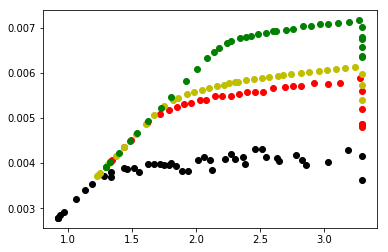

In [2]:
plt.plot(volt_IR,curr_IR,'ko')
plt.plot(volt_red,curr_red,'ro')
plt.plot(volt_orange,curr_orange,'yo')
plt.plot(volt_green,curr_green,'go')

el motivo de este comportamiento se debe a la forma en que se toman los datos, ya que variar la resistencia en los potenciometros azules usados en clase no era facil, si embargo, se realizó desde un valor de voltaje lo suficientemente bajo para que no pasara corriente por el led, hasta los 3.3 voltios que ofrece la tarjeta Chipkit.

# Primera Aproximación

Inicialmente para hallar los valores de voltaje de activacion tomamos un camino más empirico, variamos el voltaje hasta notar una pequeña chispa en el led y tomamos este valor de voltaje.

Este procedimiento se realizó para un led infrarojo (el cual se miró a travez de una camara de celular para poder distinguir la emisión de luz), uno rojo, uno naranja y uno azul. Sus respectivos voltajes de activacion fueron graficados contra $1/\lambda$ provisto por el articulo y finalmente se ajustó usando las funciones de scipy obteniendose lo siguiente:

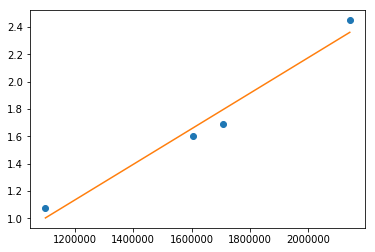

r:  0.985767125593
pendiente:  1.30234059889e-06
error:  1.57052812331e-07
h_planck:  6.960080563e-34
h_real:  6.62607004e-34
error_h:  5.04085409583 %


In [3]:
led=np.array(led)
led*=(3.3/5.)
#lamb=[1.10e6,1.60514e6,1.70648e6,1.76367e6,2.14133e6]
slope, intercept, r_value, p_value, std_err = stats.linregress(lamb,led)
x=np.linspace(lamb[0],lamb[-1],100)
y=slope*x+intercept
plt.plot(lamb,led,'o')
plt.plot(x,y,'-')
plt.show()
h_planck=slope*cons.e/cons.c
h=cons.h
error=(h_planck-h)/h
print ('r: ',r_value)
print ('pendiente: ',slope)
print ('error: ',std_err)
print ('h_planck: ',h_planck)
print ('h_real: ',h)
print ('error_h: ',error*100,'%')

aquí se puede ver que apezar de lo simple de este acercamiento, se obtuvo un error de tan solo $5 %$ respecto al valor real de $h$ extraido de la librería scipy. 

# Segunda Aproximación

en este intento se sigue el algoritmo prouesto por el articulo, graficar los voltajes contra las corrientes de los leds, luego, extraer su incercepto con el eje y como la corriente de activación y con la ley de ohm, el voltaje.

en este caso se usaron leds de color: infrarojo, rojo,naranja y verde, se deseaba usar un azul tambien pero los datos quedaron corruptos y no pudieron recuperarse

medido  1.07745 ajustado  1.19341505743
r:  0.591988465582


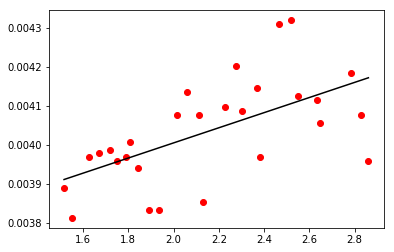

In [10]:
plt.plot(VIR,IIR,'ro')

pendiente, intercepto, r_value, p_value, std_err = stats.linregress(VIR,IIR)
yir=[]
VActivacion_IR=intercepto*330
for i in VIR:
    yir.append((pendiente*i)+intercepto)
plt.plot(VIR,yir,'k-')

print ('medido ',led[0],'ajustado ',VActivacion_IR)
print ('r: ',r_value)

medido  1.59984 ajustado  1.48745682735
r:  0.977542770489


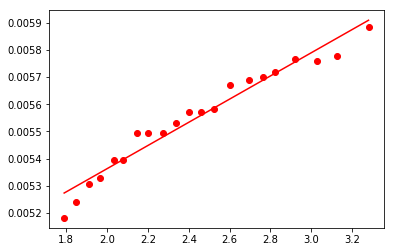

In [12]:
plt.plot(Vred,Ired,'ro')

pendiente, intercepto, r_value, p_value, std_err = stats.linregress(Vred,Ired)
yred=[]
VActivacion_rojo=intercepto*330
for i in Vred:
    yred.append((pendiente*i)+intercepto)
plt.plot(Vred,yred,'r-')

print ('medido ',led[1],'ajustado ',VActivacion_rojo)
print ('r: ',r_value)

medido  1.69356 ajustado 1.59490946618
r:  0.991095580645


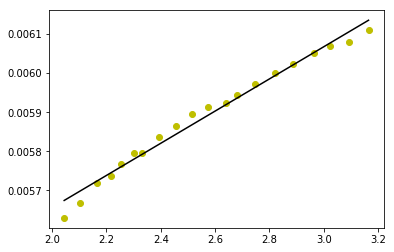

In [15]:
plt.plot(Vorange,Iorange,'yo')

pendiente, intercepto, r_value, p_value, std_err = stats.linregress(Vorange,Iorange)
yorange=[]
VActivacion_naranja=intercepto*330
for i in Vorange:
    yorange.append((pendiente*i)+intercepto)
plt.plot(Vorange,yorange,'k-')

print ('medido ',led[-2],'ajustado',VActivacion_naranja)
print ('r: ',r_value)

ajustado 1.93349510728
r:  0.99221980499


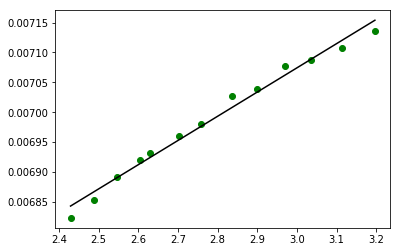

In [14]:
plt.plot(Vgreen,Igreen,'go')

pendiente, intercepto, r_value, p_value, std_err = stats.linregress(Vgreen,Igreen)
ygreen=[]
VActivacion_verde=intercepto*330
for i in Vgreen:
    ygreen.append((pendiente*i)+intercepto)
plt.plot(Vgreen,ygreen,'k-')

print ('ajustado',VActivacion_verde)
print ('r: ',r_value)

una vez se obtienen los datos, se procede arealizar el mismo ajuste de la primera aproximacion, pero con un error mayor:

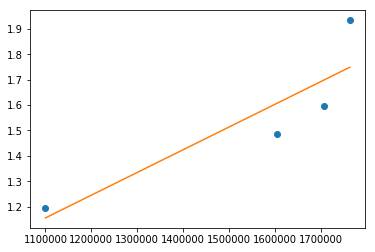

r:  0.885614023895
pendiente:  8.92977082378e-07
error:  3.3112625803e-07
h_planck:  4.77232487382e-34
h_real:  6.62607004e-34
error_h:  27.976540468 %


In [8]:
V_ajuste=[VActivacion_IR,VActivacion_rojo,VActivacion_naranja,VActivacion_verde] #ir,rojo,naranja,verde,azul
#print (len(V_ajuste))
#print (len(lamb_ajuste))
slope, intercept, r_value, p_value, std_err = stats.linregress(lamb_ajuste,V_ajuste)
x=np.linspace(lamb_ajuste[0],lamb_ajuste[-1],100)
y=slope*x+intercept
plt.plot(lamb_ajuste,V_ajuste,'o')
plt.plot(x,y,'-')
plt.show()
h_planck=slope*cons.e/cons.c
h=cons.h
error=abs(h_planck-h)/h
print ('r: ',r_value)
print ('pendiente: ',slope)
print ('error: ',std_err)
print ('h_planck: ',h_planck)
print ('h_real: ',h)
print ('error_h: ',error*100, '%')

la explicación posible de este mayor error puede ser el hecho de que no se siguió un procedimiento riguroso y formarl para encontrar las corrientes con comportamiento lineal en cada caso. solo se buscó la zona con mejor linealidad.

finalmente, se quizó estudiar el posible resultado al eliminar el led infrarojo, el cual como se observa en la grafica de su voltaje, no dió valores muy estables, además de tener una r de tan solo $0.5$ lo cual es bastante bajo en comparacion de los demás leds.

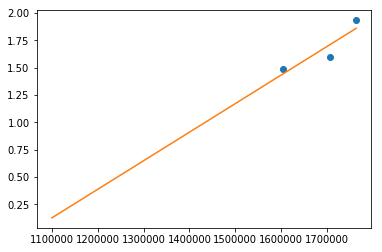

r:  0.900387684296
pendiente:  2.6107632338e-06
error:  1.26158223227e-06
h_planck:  1.39526652656e-33
h_real:  6.62607004e-34
error_h:  110.572257483


In [17]:
V_ajuste2=[VActivacion_rojo,VActivacion_naranja,VActivacion_verde] #ir,rojo,naranja,verde,azul
#print (len(V_ajuste2))
#print (len(lamb_ajuste2))
slope, intercept, r_value, p_value, std_err = stats.linregress(lamb_ajuste2,V_ajuste2)
x=np.linspace(lamb_ajuste[0],lamb_ajuste[-1],100)
y=slope*x+intercept
plt.plot(lamb_ajuste2,V_ajuste2,'o')
plt.plot(x,y,'-')
plt.show()
h_planck=slope*cons.e/cons.c
h=cons.h
error=abs(h_planck-h)/h
print ('r: ',r_value)
print ('pendiente: ',slope)
print ('error: ',std_err)
print ('h_planck: ',h_planck)
print ('h_real: ',h)
print ('error_h: ',error*100)

aquí se concluye que a pesar de tener un valor no tan exacto como los demás, es necesario para que el ajuste se